In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
X, y = fetch_openml('mnist_784', return_X_y=True)
X_std = X/255

In [3]:
# code from lab 5
def sort_evals_descending(evals, evectors):
    """
    Sorts eigenvalues and eigenvectors in decreasing order. This function
    also aligns the first two eigenvectors to be in first two quadrants if
    the data is 2D (remember that any eigenvector's direction can be inverted
    and it is still an eigenvector with the same eigenvalue). 
    """

    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors
def pca(X):
    """
    Performs PCA on multivariate data.

    Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

    Returns:
    (numpy array of floats)   : Data projected onto the new basis
    (numpy array of floats)   : eigenvectors
    (numpy array of floats)   : corresponding eigenvalues

    """

    # Subtract the mean of X
    X_bar = X - np.mean(X, axis=0)
    # Calculate the sample covariance matrix
    cov_matrix = 1 / X.shape[0] * np.matmul(X_bar.T, X_bar)
    # Calculate the eigenvalues and eigenvectors
    evals, evectors = np.linalg.eigh(cov_matrix)
    # Sort the eigenvalues in descending order
    evals, evectors = sort_evals_descending(evals, evectors)
    # Project the data onto the new eigenvector basis
    score = np.matmul(X, evectors)

    return score, evectors, evals
# code from lab 4
def plot_k_means(X, cluster_assignments, centroid_locations):
    plt.figure(figsize=(6, 6))
    plt.viridis() # Set colour map
    plt.scatter(X[:, 0], X[:, 1], s=20, c=cluster_assignments, alpha=0.8) # plot data points
    plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='X', c=range(K), edgecolors='k') # plot centroids
    plt.show()

In [4]:
colors_d = {'0': 'red','1': 'blue','2':'green','3': 'orange','4': 'fuchsia','5':'pink','6':'brown','7':'dimgray','8':'aqua','9':'lime'}
colors = [colors_d[i] for i in y]

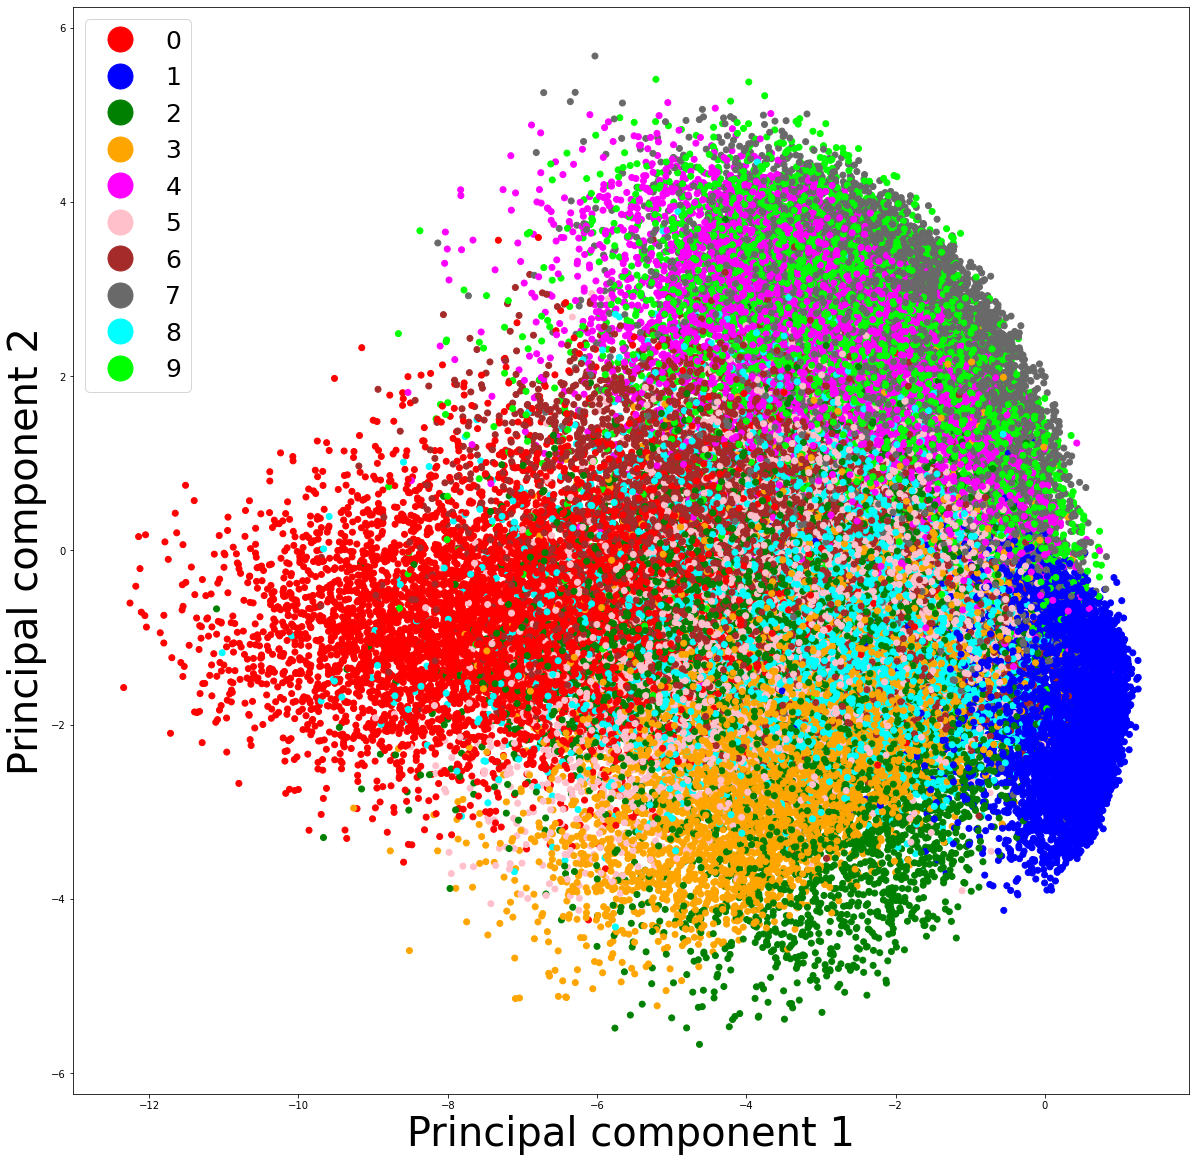

In [5]:
# perform PCA
score, evectors, evals = pca(X_std)
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.scatter(score[:, 0], score[:, 1], c=colors)
ax.set_xlabel('Principal component 1', fontsize=40)
ax.set_ylabel('Principal component 2', fontsize=40)
for d in ['0','1','2','3','4','5','6','7','8','9']:
    ax.plot(np.nan,'o', label=d,ms=25, color=colors_d[d])
ax.legend(loc=2, fontsize=25)
plt.show()

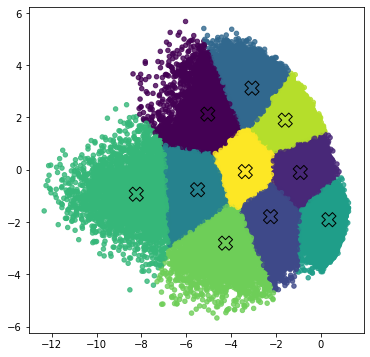

In [6]:
K = 10
#using only the first two components
kmeans = KMeans(K, init='random').fit(score[:,0:2])
cluster_assignments = kmeans.predict(score[:,0:2])
centroid_locations = kmeans.cluster_centers_
plot_k_means(score[:,0:2], cluster_assignments, centroid_locations)

In [7]:
# code adapted from https://gist.github.com/xoraus/a14b262dd3776c72b8d66c286da273c9
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        indices = [j for j, x in enumerate(kmeans.labels_) if x == i]

        # append actual labels for each point in cluster
        for k,e in enumerate(indices):
            labels.append(y[e])
        
        # determine most common label
        if len(labels) == 1:
            counts = np.bincount(labels)
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
    
    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
    
    return predicted_labels


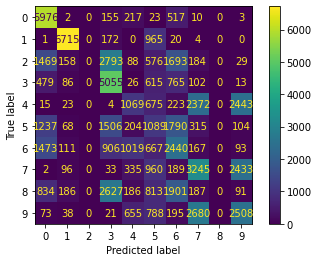

Accuracy: 0.4013857142857143



In [8]:
# test the infer_cluster_labels() and infer_data_labels() functions
y = list(map(int, y))
cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(score[:,0:2])
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
cm = confusion_matrix(y, predicted_labels, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Accuracy: {}\n".format(accuracy_score(y, predicted_labels)))

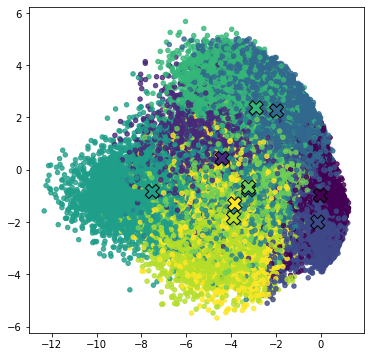

In [9]:
K = 10
#using all components
kmeans = KMeans(K, init='random').fit(score)
cluster_assignments = kmeans.predict(score)
centroid_locations = kmeans.cluster_centers_
plot_k_means(score, cluster_assignments, centroid_locations)

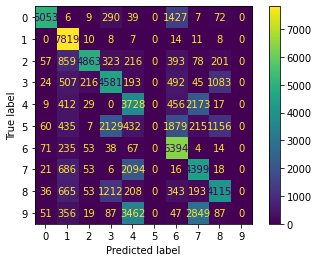

Accuracy: 0.5850285714285715



In [10]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(score)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
cm = confusion_matrix(y, predicted_labels, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print("Accuracy: {}\n".format(accuracy_score(y, predicted_labels)))